In [1]:
import math
import h5pyd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f = h5pyd.File('/home/hdf/shuttle.h5', 'r')

In [3]:
coord = f['/model/Geometry/geom_part_1/geom_domain_1/coordinates']

In [4]:
coord.shape

(3, 226800)

In [5]:
list(coord.attrs)

['layout', 'nNodes']

In [6]:
coord.attrs['layout']

2

In [7]:
coord.attrs['nNodes']

226800

In [8]:
coord[:,1:12]

array([[ 0.00086613,  0.00346216,  0.00778097,  0.01381072,  0.02153488,
         0.03093228,  0.04197717,  0.05463927,  0.06888387,  0.08467194,
         0.1019602 ],
       [-0.0003224 , -0.00064088, -0.00095734, -0.00127295, -0.00159434,
        -0.00191722, -0.00223841, -0.00256167, -0.00288961, -0.00322639,
        -0.00356913],
       [ 0.00581628,  0.01170133,  0.01766339,  0.02370692,  0.02997588,
         0.03628989,  0.04257536,  0.04902852,  0.05581181,  0.06304169,
         0.0705438 ]], dtype=float32)

In [9]:
x_pts = coord[0,::100]   # plot one point out of 100

In [10]:
(x_pts.min(), x_pts.max())

(-0.49339628, 1.4088135)

In [11]:
y_pts = coord[1,::100]

In [12]:
y_pts.min(), y_pts.max()

(-0.086110778, 1.2211009)

In [13]:
z_pts = coord[2, ::100]

In [14]:
z_pts.min(), z_pts.max()

(-0.84095269, 1.3329326)

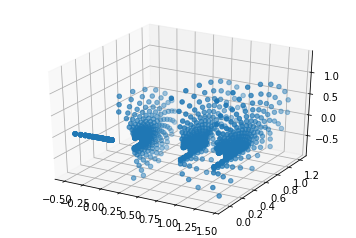

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pts, y_pts, z_pts)
plt.show()


In [16]:
# Determine maximum distance between any two consecutive coordinates
max_dist = 0.0
start = 0
npoints = coord.attrs['nNodes']
batch_size = 50000  # read in batches to avoid using too much memory
last_point = None
while start<npoints:
    stop = start+batch_size
    if stop > npoints:
        stop = npoints
    pts = coord[:,start:stop]
    for i in range(stop-start):
        pt = pts[:, i]
        if last_point is not None:
            d = math.sqrt((last_point[0] - pt[0])**2 + (last_point[1] - pt[1])**2 + (last_point[2] - pt[2])**2)
            if d > max_dist:
                max_dist = d
        last_point = pt
    print("batch {}-{}, max_dist: {:.6f}".format(start, stop, max_dist))
    start = stop
        
    

batch 0-50000, max_dist: 3.139434
batch 50000-100000, max_dist: 3.149659
batch 100000-150000, max_dist: 3.191808
batch 150000-200000, max_dist: 3.407604
batch 200000-226800, max_dist: 3.859985


In [17]:
print("max neighbor distance: {:.6f}".format(max_dist))

max neighbor distance: 3.859985
